In [2]:
import sys, os
root_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(root_dir)
from src.data.synthetic_dataset import MarkovianHeteroDynamicDataset

c:\Users\mhr_k\miniconda3\envs\R-learner\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import numpy as np
params = {
    'n_units':10,
    'n_periods':3,
    'sequence_length':10,
    'n_x':5,
    'n_treatments':1,
    's_x':1,
    's_t':1,
    'sigma_x':0.8,
    'sigma_t':0.8,
    'sigma_y':1.0,
    'gamma':0.2,
    'autoreg':0.25,
    'state_effect': 0.25,
    'hetero_strength':0.5,
    'hetero_inds':np.arange(448, 450),
    'conf_str': 5
}

In [5]:
dgp = MarkovianHeteroDynamicDataset(params)

AttributeError: 'dict' object has no attribute 'hetero_inds'

In [7]:
Y, T, X = dgp.generate_observational_data()

In [3]:
import matplotlib.pyplot as plt
def plot_patient_trajectory(X, Y, T, id):
    plt.figure(figsize = (15, 15))
    plt.subplot(3, 1, 1)
    for it in range(5):
        plt.plot(X[id, :, it], label = f'X[{it}]')
    plt.legend()
    plt.subplot(3, 1, 2)
    plt.plot(T[id, :, 0], label = f'T[0]')
    plt.legend()
    plt.subplot(3, 1, 3)
    plt.plot(Y[id], label = 'Outcome Y')
    plt.legend()
    plt.show()

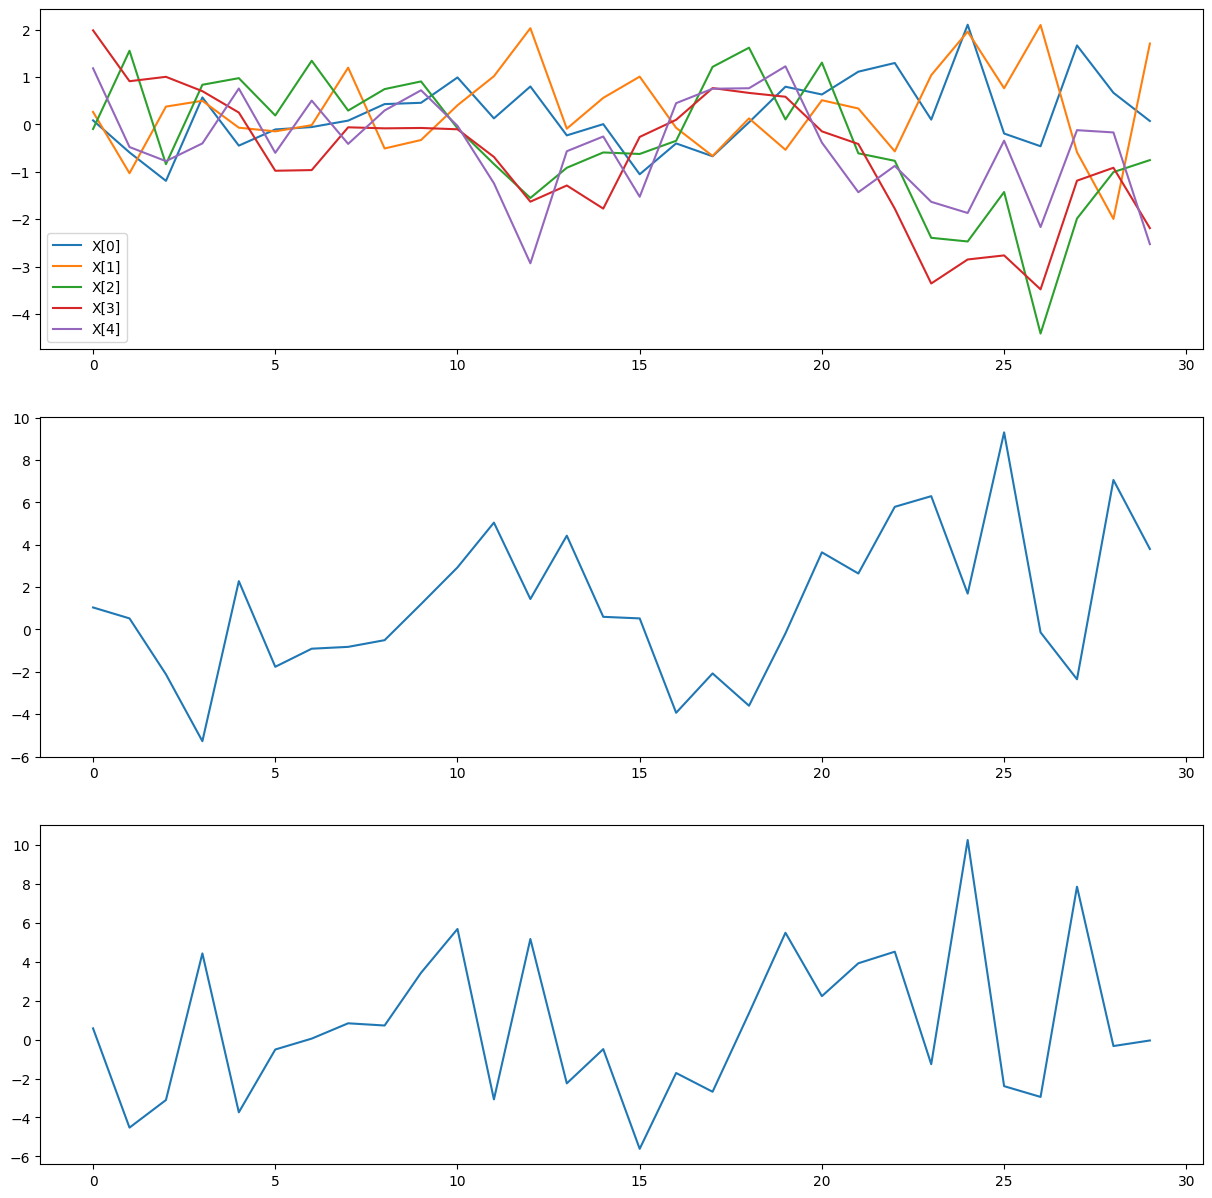

In [14]:
plot_patient_trajectory(X, Y, T, 9)

Debug: Simple version loaded from config

In [4]:
from omegaconf import OmegaConf
cfg = OmegaConf.load("../config/dataset/synthetic.yaml")
dataset = MarkovianHeteroDynamicDataset(params=cfg)
Y, T, X = dataset.generate_observational_data()

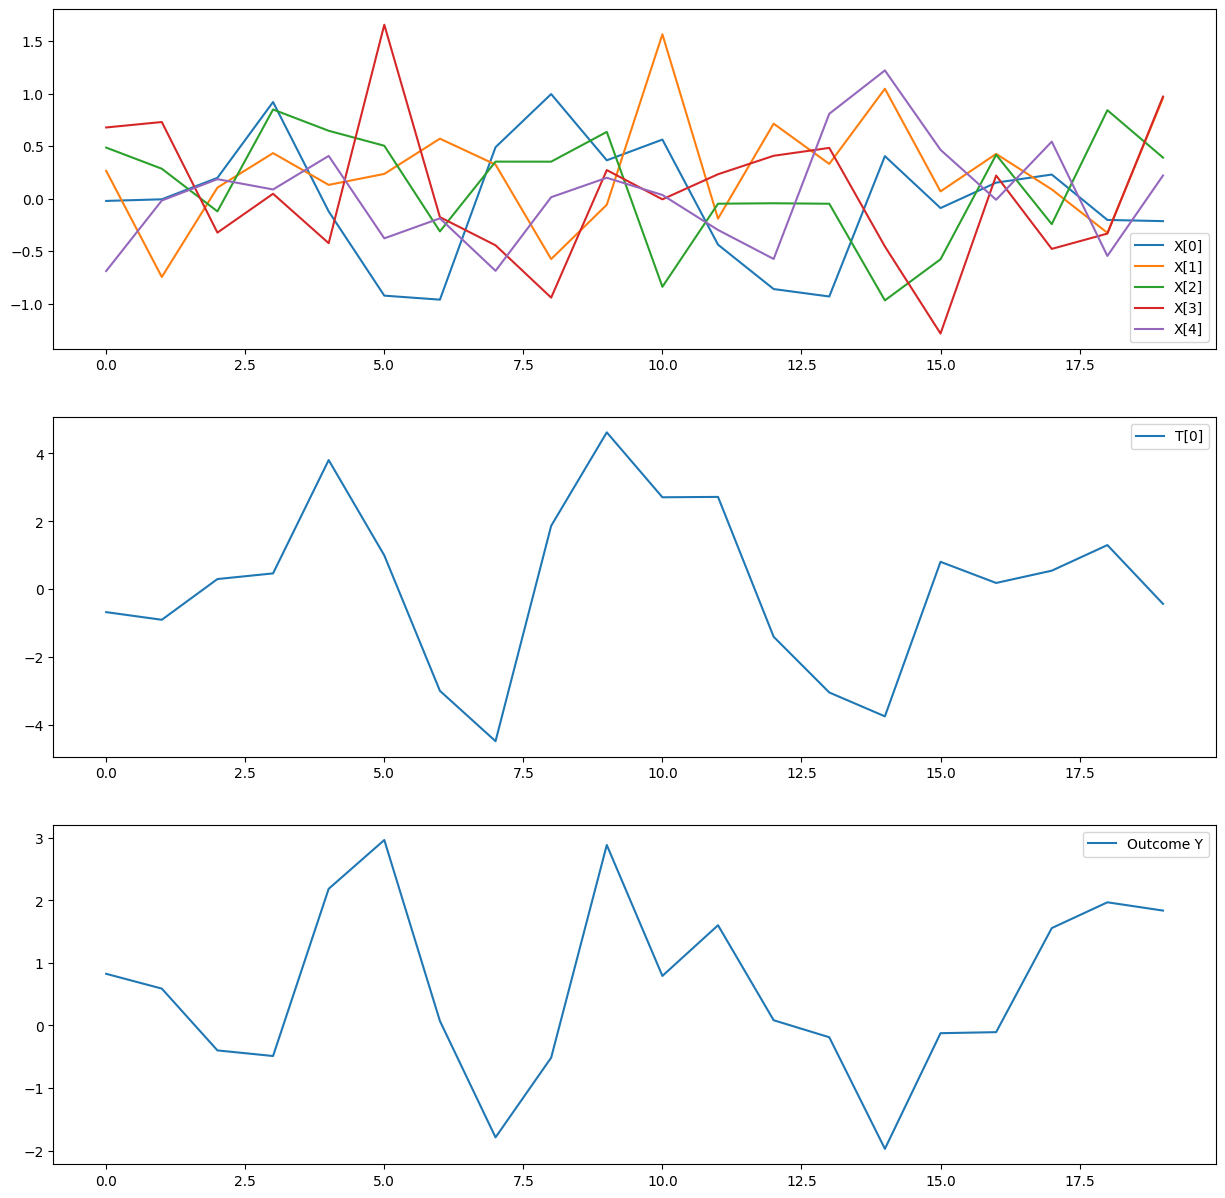

In [5]:
plot_patient_trajectory(X, Y, T, 2)